# 仮説検定を実装する

## 1. 必要なモジュールの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

%matplotlib inline

## 2. 1標本における解析

In [2]:
# 任意の平均値・標準偏差をもつ正規乱数をサイズ1000個で作成し、"data1"に格納

norm_dist = stats.norm(loc = 15, scale = 1)
data1 = norm_dist.rvs(size = 1000)

(array([  6.,  18.,  99., 206., 276., 231., 124.,  34.,   4.,   2.]),
 array([11.74174474, 12.43945146, 13.13715818, 13.8348649 , 14.53257163,
        15.23027835, 15.92798507, 16.62569179, 17.32339851, 18.02110523,
        18.71881195]),
 <a list of 10 Patch objects>)

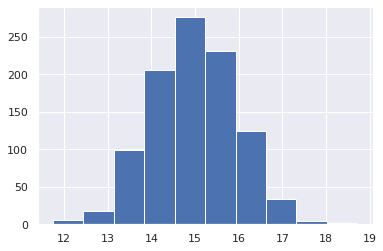

In [3]:
#　data1のヒストグラムを作成
plt.hist(data1)

In [4]:
# 母平均の点推定を計算し、結果を表示
mu = np.mean(data1)
mu

14.968547463740592

In [5]:
# 95%信頼区間の推定を行い、上側信頼限界と下側信頼限界の値を表示
df = len(data1)-1 #自由度を計算

sigma = np.std(data1, ddof=1)
se = sigma/np.sqrt(len(data1)) #標準誤差を計算

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale = se)
interval


(14.90820967046642, 15.028885257014764)

In [6]:
# 任意の帰無仮説を設定し、それに基づきt値を計算して、片側検定した結果を表示してください

t_value = (mu-15)/se
t_value

alpha = stats.t.cdf(np.abs(t_value), df=df) # 上側の裾を使用して確率を計算
1-alpha

0.153297122340445

In [7]:
# 任意の帰無仮説を設定し、それに基づきt値を計算して、両側検定した結果を表示してください
t_value = (mu-15)/se
t_value

alpha = stats.t.cdf(np.abs(t_value), df=df) # 上側の裾を使用して確率を計算
(1-alpha)*2

0.30659424468089

## 3. 2標本における解析

標本をもう1つ増やし、先ほどの標本と差があるのか否かについて検討する。

In [8]:
# 任意の平均値・標準偏差をもつ正規乱数をサイズ1000個で作成し、"data2"に格納
norm_dist2 = stats.norm(loc = 15, scale = 1)
data2 = norm_dist2.rvs(size = 1000)

(array([  2.,   9.,  28., 108., 228., 307., 205.,  86.,  23.,   4.]),
 array([11.00158179, 11.7445358 , 12.48748981, 13.23044382, 13.97339783,
        14.71635184, 15.45930585, 16.20225986, 16.94521387, 17.68816788,
        18.43112189]),
 <a list of 10 Patch objects>)

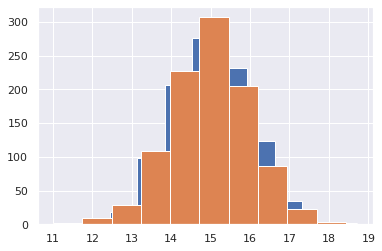

In [9]:
# data1とdata2をヒストグラムにてプロット
plt.hist(data1)
plt.hist(data2)

In [10]:
# data1, data2それぞれの値を使って「対応のあるt検定」で計算し、結果を表示
mu = np.mean(data1)
mu2 = np.mean(data2)

df = len(data1)-1 #自由度を計算
df2 = len(data2)-1 #自由度を計算

sigma = np.std(data1, ddof=1)
se = sigma/np.sqrt(len(data1)) #標準誤差を計算
sigma2 = np.std(data2, ddof=1)
se2 = sigma/np.sqrt(len(data2)) #標準誤差を計算

stats.ttest_rel(data1,data2)

Ttest_relResult(statistic=-0.50834669202804, pvalue=0.6113224624422813)

In [11]:
# data1, data2それぞれの値を使って「対応のないt検定」で計算し、結果を表示
stats.ttest_ind(data1,data2,equal_var = False)

Ttest_indResult(statistic=-0.5078254923961901, pvalue=0.6116318779806563)

## 4. ここまでの仮説検定の結果を解釈して下記に記載してください

data1はdata2と「有意に異なるとは言えない」